In [4]:
import os
import numpy as np
import pandas as pd
from plotnine import *

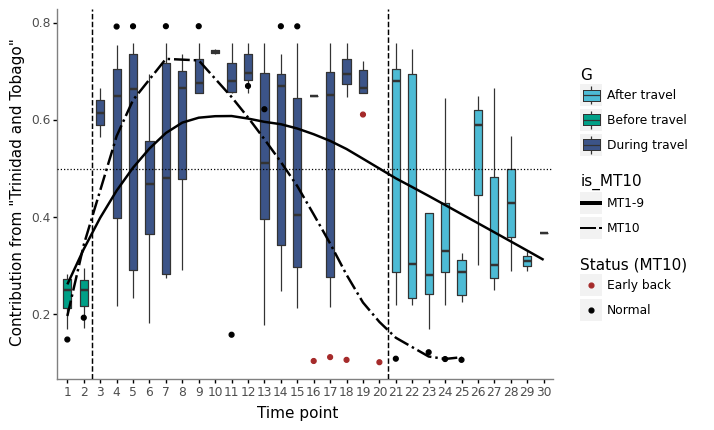

<ggplot: (8732981709870)>


/home/chonghui/envs/miniconda3/envs/expert/lib/python3.8/site-packages/plotnine/ggplot.py:727: PlotnineWarning: Saving 9.600000000000001 x 4.8 in image.
/home/chonghui/envs/miniconda3/envs/expert/lib/python3.8/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: Figure.pdf


In [23]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42

suffix = 'Transfer_DM'
contributions = pd.concat([pd.read_csv('experiments/exp_{}/Search_{}/layer-2.csv'.format(i, suffix), index_col=0) for i in range(1, 11)])
metadata = pd.read_csv('dataFiles/metadata.csv').set_index('#SampleID')
contributions = contributions.join(metadata, how='left')
#contributions = contributions[contributions.Phase != 'T6']
#data = contributions.groupby(by=['People', 'Phase'], as_index=False).mean()
contributions['GroupAll'] = '1'
contributions = contributions.sort_values('Timepoint')
contributions['Timepoint_str'] = contributions['Timepoint'].astype(str)
contributions['is_MT10'] = (contributions.People == 'MT10').map({True: 'MT10', False: 'MT1-9'})
data = contributions
data.loc[data.Phase=='T1', 'G'] = 'Before travel'
data.loc[data.Phase.isin(['T2', 'T3', 'T4']), 'G'] = 'During travel'
data.loc[data.Phase.isin(['T5', 'T6']), 'G'] = 'After travel'
T_unique = contributions[['Phase', 'Timepoint']].drop_duplicates()
contributions['Period'] = contributions.Phase.map(T_unique.Phase.value_counts(sort=False).to_dict())
contributions['Status (MT10)'] = 'Normal'
contributions.loc[(contributions.People == 'MT10')&(contributions.Timepoint > 15)&(contributions.Timepoint < 21), 'Status (MT10)'] = 'Early back'

plot = (ggplot(data, aes(x='Timepoint_str', y='root:Trinidad and Tobago'))
        + geom_boxplot(aes(fill='G', group='Timepoint_str'), outlier_shape='', show_legend=True, data=data[data.People != 'MT10'], width=0.5)
        #+ geom_violin(aes(fill='Phase', group='Timepoint_str'), show_legend=True, data=data[data.People != 'MT10'], bw=0.1)
        + scale_fill_manual(["#4DBBD5FF", "#00A087FF", "#3C5488FF", "#F39B7FFF", "#8491B4FF", "#91D1C2FF", "#DC0000FF", "#7E6148FF", "#B09C85FF"])
        #+ geom_boxplot(aes(group='Timepoint_str'), fill='white', alpha=0.5, show_legend=False, outlier_shape='', data=data[data.People != 'MT10'], width=0.4)
        + geom_smooth(aes(linetype='is_MT10', group='is_MT10'), se=False, method='loess', show_legend=True)
        + scale_linetype_manual(['solid', 'dashdot'])
        + geom_point(aes(color='Status (MT10)'), data=data[data.People == 'MT10'])
        + scale_color_manual(['brown', "black"])
        + theme(panel_grid_major = element_blank(), panel_grid_minor = element_blank(), panel_background = element_blank(),
             axis_line_x = element_line(color="gray", size = 1), axis_line_y = element_line(color="gray", size = 1))
        + geom_hline(yintercept=0.5, linetype="dotted")
        + geom_vline(xintercept=[2.5, 20.5], linetype="dashed", size=0.6)
        #+ geom_label(data='Early back', position=[15.5, 0.2])
        + scale_x_discrete(limits=contributions['Timepoint_str'].unique())
        + xlab('Time point')
        + ylab('Contribution from "Trinidad and Tobago"')
)

print(plot)
plot.save('Figure.pdf'.format(suffix), dpi=120, width=6.4*1.5, height=4.8)

In [28]:
df = pd.concat([pd.read_csv('experiments/exp_{}/Search_Transfer_DM/layer-2.csv'.format(i), index_col=0) for i in range(1, 11)]).join(pd.read_csv('dataFiles/metadata.csv', index_col=0))

In [37]:
from scipy.stats import wilcoxon
x = df[df.Treatment == 'MTC']['root:China']
y = df[df.Treatment == 'MTC']['root:Trinidad and Tobago']
wilcoxon(x, y)

WilcoxonResult(statistic=0.0, pvalue=1.9073486328125e-06)

In [38]:
x = df[df.Treatment == 'MTT']['root:China']
y = df[df.Treatment == 'MTT']['root:Trinidad and Tobago']
wilcoxon(x, y)

WilcoxonResult(statistic=1784.0, pvalue=0.00024373847491785788)

In [39]:
x = df[df.Treatment == 'MTB']['root:China']
y = df[df.Treatment == 'MTB']['root:Trinidad and Tobago']
wilcoxon(x, y)

WilcoxonResult(statistic=324.0, pvalue=3.870562705678716e-05)